# Creating a Dynamical Decoupling Sequence

This notebook illustrates how to use Q-CTRL Open Controls to create a [Dynamical Decoupling Sequence (DDS)](https://en.wikipedia.org/wiki/Dynamical_decoupling). 

Dynamical decoupling is the use of fast pulses, often treated as instant ideal unitary operations, on a qubit to decouple it from its environment and improve its coherence time. The train of pulses is called a sequence, hence DDS. DDS can be used to increase the coherence time of a qubit or they can be used as part of a characterization process to identify coherence time and/or noise spectra.

Q-CTRL Open Controls can be used to create a DDS from a library of well-known dynamical decoupling schemes. Once created, it can be printed, plotted, exported in CSV or JSON format for use on a quantum computer or any of [Q-CTRL's products](https://q-ctrl.com/products/).

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qctrlopencontrols import new_predefined_dds, DynamicDecouplingSequence

## Predefined Dynamical Decoupling Schemes

Q-CTRL Open Controls can create DDSs according to the following protocols:

1. `Ramsey`
2. `spin echo`
3. `Carr-Purcell`
4. `Carr-Purcell-Meiboom-Gill`
5. `Uhrig`
6. `periodic`
7. `Walsh single-axis`
8. `quadratic`
9. `X concatenated`
10. `XY concatenated`

See the [technical documentation](https://docs.q-ctrl.com/control-formats#dynamical-decoupling-sequences) for details.

## Creating and Printing a Dynamical Decoupling Sequence

A DDS is defined as a set of instant unitary operations, each defined with by a `rabi_rotation`, a `azimuthal_angle`, a `detuning_angle`, and applied at a particular time (`offset`). The mathematical definition of a sequence is explained in the [technical documentation](http://docs.q-ctrl.com/control-library#dynamical-decoupling-sequences).

Q-CTRL Open controls can generate a DDS from a library of dynamical decoupling schemes, mathematically defined in the [technical documentation](https://docs.q-ctrl.com/control-formats#dynamical-decoupling-sequences). Below we give a few examples of generating DDSs. The schemes are grouped into cells if they have common keywords.

In [2]:
## Spin echo sequence
se_dds = new_predefined_dds(scheme='spin echo', duration=10e-6, name='SE DDS')
print(se_dds)

SE DDS:
Duration = 1e-05
Offsets = [0.0,0.5,1.0] x 1e-05
Rabi Rotations = [0.0,1.0,0.0] x pi
Azimuthal Angles = [0.0,0.0,0.0] x pi
Detuning Rotations = [0.0,0.0,0.0] x pi


In [3]:
## Carr-Purcell sequence
## 'Carr-Purcell-Meiboom-Gill', 'Uhrig single-axis' or 'Periodic single-axis' schemes use same keywords
cp_dds = new_predefined_dds(
    scheme='Carr-Purcell', 
    duration=10e-6, 
    number_of_offsets = 4.,
    name='CP DDS')
print(cp_dds)

CP DDS:
Duration = 1e-05
Offsets = [0.0,0.125,0.375,0.625,0.875,1.0] x 1e-05
Rabi Rotations = [0.0,1.0,1.0,1.0,1.0,0.0] x pi
Azimuthal Angles = [0.0,0.0,0.0,0.0,0.0,0.0] x pi
Detuning Rotations = [0.0,0.0,0.0,0.0,0.0,0.0] x pi


In [4]:
## Walsh single-axis
walsh_dds = new_predefined_dds(
    scheme='Walsh single-axis', 
    duration=10e-6, 
    paley_order = 4.,
    name='Walsh DDS')
print(walsh_dds)

Walsh DDS:
Duration = 1e-05
Offsets = [0.0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0] x 1e-05
Rabi Rotations = [0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0] x pi
Azimuthal Angles = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0] x pi
Detuning Rotations = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0] x pi


In [5]:
## Quadratic sequence
quadratic_dds = new_predefined_dds(
    scheme='quadratic', 
    duration=10e-6, 
    number_inner_offsets = 2,
    number_outer_offsets = 2,
    name='Quadratic DDS')
print(quadratic_dds)

Quadratic DDS:
Duration = 1e-05
Offsets = [0.0,0.06249999999999998,0.18749999999999994,0.24999999999999994,0.37499999999999994,0.6249999999999999,0.7499999999999999,0.8124999999999999,0.9375,1.0] x 1e-05
Rabi Rotations = [0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0] x pi
Azimuthal Angles = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0] x pi
Detuning Rotations = [0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0] x pi


In [6]:
## X concatenated sequence
## 'XY concatenated' scheme uses the same keyword
xc_dds = new_predefined_dds(
    scheme='X concatenated', 
    duration=10e-6, 
    concatenation_order = 2,
    name='XC DDS')
print(xc_dds)

XC DDS:
Duration = 1e-05
Offsets = [0.0,0.25,0.75,1.0] x 1e-05
Rabi Rotations = [0.0,1.0,1.0,0.0] x pi
Azimuthal Angles = [0.0,0.0,0.0,0.0] x pi
Detuning Rotations = [0.0,0.0,0.0,0.0] x pi


In [7]:
## Ramsay DDS
ramsey_dds = new_predefined_dds(scheme='Ramsey', duration=1e-6, name='Ramsey DDS')
print(ramsey_dds)

Ramsey DDS:
Duration = 1e-06
Offsets = [0.0,1.0] x 1e-06
Rabi Rotations = [0.0,0.0] x pi
Azimuthal Angles = [0.0,0.0] x pi
Detuning Rotations = [0.0,0.0] x pi


### Plotting a DDS

Once created, Q-CTRL Open Controls provides the method `get_plot_formatted_arrays` to create a set of formatted arrays ready to be immediately plotted with Matplotlib. We use the `quadratic_dds` as a sample sequence to generate plots of the `rabi_rotations`, `azimuthal_angles` and `detuning_rotations`.

Text(0, 0.5, 'Detuning Rotation (rad)')

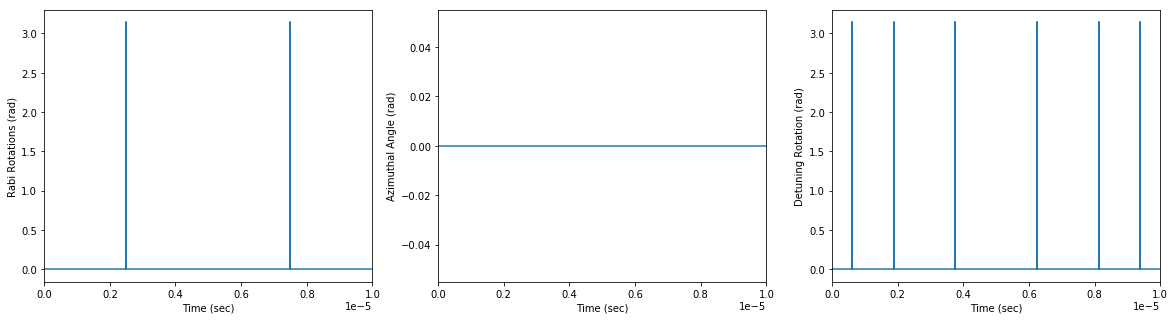

In [8]:
formatted_plot_data = quadratic_dds.get_plot_formatted_arrays()
rabi_rotations, azimuthal_angles, detuning_rotations, times = (formatted_plot_data['rabi_rotations'],
                                                               formatted_plot_data['azimuthal_angles'],
                                                               formatted_plot_data['detuning_rotations'],
                                                               formatted_plot_data['times'])

# prepare the axes
figure, (rabi_plot_axis, azimuth_plot_axis, detuning_plot_axis) = plt.subplots(
    1, 3, figsize=(20,5))

rabi_plot_axis.plot(times, rabi_rotations)
rabi_plot_axis.ticklabel_format(style='sci', axis='x', scilimits=(0, 2))
rabi_plot_axis.set_xlim([0, max(times)])
rabi_plot_axis.set_xlabel('Time (s)')
rabi_plot_axis.set_ylabel('Rabi Rotations (rad)')

azimuth_plot_axis.plot(times, azimuthal_angles)
azimuth_plot_axis.ticklabel_format(style='sci', axis='x', scilimits=(0, 2))
azimuth_plot_axis.set_xlim([0, max(times)])
azimuth_plot_axis.set_xlabel('Time (s)')
azimuth_plot_axis.set_ylabel('Azimuthal Angle (rad)')

detuning_plot_axis.plot(times, detuning_rotations)
detuning_plot_axis.ticklabel_format(style='sci', axis='x', scilimits=(0, 2))
detuning_plot_axis.set_xlim([0, max(times)])
detuning_plot_axis.set_xlabel('Time (s)')
detuning_plot_axis.set_ylabel('Detuning Rotation (rad)')


### Exporting the Dynamical Decoupling Sequence

Q-CTRL Open Controls enables exporting DDS in CSV or JSON format. An exported sequence is [formatted](https://docs.q-ctrl.com/control-formats) to be compatible with [Q-CTRL BLACK OPAL](https://app.q-ctrl.com).

An ideal DDS is defined as a sequence of instantaneously-applied pulses (typically rotations around one or more of the Cartesian control axes - x,y,z). However, in reality, the rate of rotation is limited by the `maximum_rabi_rate` and/or `maximum_detuning_rate` for a given pulse. Due to this limiting factor, the target rotation is implemented over a control segment with finite duration. Q-CTRL Open Controls converts a `DynamicDecouplingSequence` into a `DrivenControl` before exporting the resulting `DrivenControl`. This conversion requires the `maximum_rabi_rate` and `maximum_detuning_rate` to be specified and raises an error if the conversion is not successful (i.e. overlapping control segments due to low `maximum_rabi_rate` or `maximum_detuning_rate` etc.).

Q-CTRL Open Controls can export a sequence in either `cartesian` or `cylindrical` coordinates. For details, consult the [technical documentation](https://docs.q-ctrl.com/output-data-formats#q-ctrl-hardware).

In the example below, we chose the `quadratic_dds` (created above) for exporting to a CSV file.

In [9]:
file_type='CSV'
filename='example_sequence.csv'


quadratic_dds.export_to_file(
    filename=filename, 
    file_type=file_type,
    maximum_rabi_rate=2e6*np.pi,
    maximum_detuning_rate=4e6*np.pi)

In [10]:
## Reload the file and check its content to better understand the format
with open(filename, 'rt') as handle:
    file_content = handle.readlines()
for line in file_content:
    print(line)

rabi_rate,azimuthal_angle,detuning,duration,maximum_rabi_rate

0.0,0.0,0.0,4.999999999999999e-07,6283185.307179586

0.0,0.0,3.141592653589793,2.4999999999999994e-07,6283185.307179586

0.0,0.0,0.0,9.999999999999997e-07,6283185.307179586

0.0,0.0,3.141592653589793,2.4999999999999994e-07,6283185.307179586

0.0,0.0,0.0,2.5000000000000015e-07,6283185.307179586

1.0,0.0,0.0,5.000000000000003e-07,6283185.307179586

0.0,0.0,0.0,8.749999999999997e-07,6283185.307179586

0.0,0.0,3.141592653589793,2.499999999999997e-07,6283185.307179586

0.0,0.0,0.0,2.2500000000000005e-06,6283185.307179586

0.0,0.0,3.141592653589793,2.499999999999993e-07,6283185.307179586

0.0,0.0,0.0,8.750000000000001e-07,6283185.307179586

1.0,0.0,0.0,4.999999999999994e-07,6283185.307179586

0.0,0.0,0.0,2.50000000000001e-07,6283185.307179586

0.0,0.0,3.141592653589793,2.499999999999993e-07,6283185.307179586

0.0,0.0,0.0,1.0000000000000023e-06,6283185.307179586

0.0,0.0,3.141592653589793,2.499999999999993e-07,6283185.307179586

0

### Opening the Exported Sequence in Q-CTRL BLACK OPAL

The exported CSV files are compatible for analysis by a suite of tools offered by [Q-CTRL BLACK OPAL](https://app.q-ctrl.com). For example, you can upload the exported file in the [1-QUBIT Workspace](https://app.q-ctrl.com/oneQubit) for further analysis. The process to upload a custom control is described in [Uploading and Evaluating Custom Controls](https://help.q-ctrl.com/black-opal/guides/uploading-and-evaluating-custom-controls). For a full capability of BLACK OPAL, consult [Q-CTRL Help](https://help.q-ctrl.com/black-opal)

## Custom Definition of Dynamic Decoupling Sequence

An arbitrary `DynamicDecouplingSequence` can be created by providing a `duration` along with arrays for the `rabi_rotations`, `azimuthal_angles`, `detuning_rotations` and offsets.

Text(0, 0.5, 'Detuning Rotation (rad)')

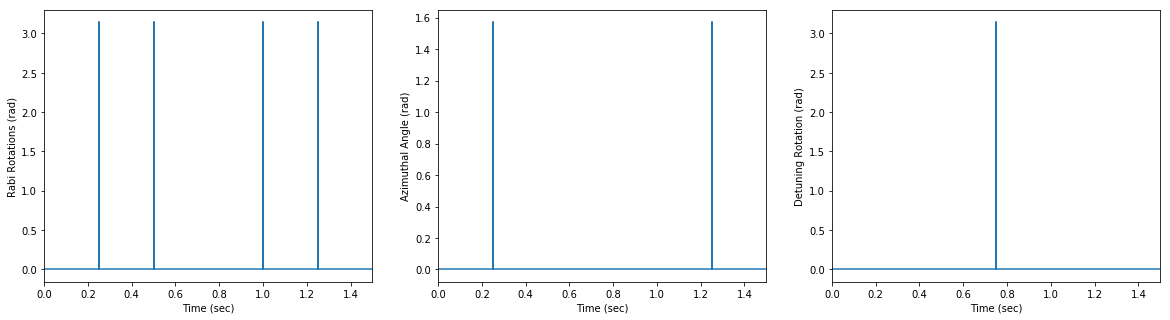

In [11]:
_duration = 1.50
_rabi_rotations = [0., np.pi, np.pi, 0., np.pi, np.pi, 0.]
_azimuthal_angles = [0., np.pi/2, 0., 0., 0., np.pi/2, 0.]
_detuning_rotations = [0., 0., 0., np.pi, 0., 0., 0.]
_offsets = [0., 0.25, 0.50, 0.75, 1.00, 1.25, 1.50]
_name = 'Custom DDS'

custom_dds = DynamicDecouplingSequence(duration=_duration,
                                        rabi_rotations=_rabi_rotations,
                                        azimuthal_angles=_azimuthal_angles,
                                        detuning_rotations=_detuning_rotations,
                                        offsets=_offsets,
                                        name=_name)

## let us plot and verify
formatted_plot_data = custom_dds.get_plot_formatted_arrays()
rabi_rotations, azimuthal_angles, detuning_rotations, times = (formatted_plot_data['rabi_rotations'],
                                                               formatted_plot_data['azimuthal_angles'],
                                                               formatted_plot_data['detuning_rotations'],
                                                               formatted_plot_data['times'])

figure, (rabi_plot_axis, azimuth_plot_axis, detuning_plot_axis) = plt.subplots(
    1, 3, figsize=(20,5))

rabi_plot_axis.plot(times, rabi_rotations)
rabi_plot_axis.ticklabel_format(style='sci', axis='x', scilimits=(0, 2))
rabi_plot_axis.set_xlim([0, max(times)])
rabi_plot_axis.set_xlabel('Time (sec)')
rabi_plot_axis.set_ylabel('Rabi Rotations (rad)')

azimuth_plot_axis.plot(times, azimuthal_angles)
azimuth_plot_axis.ticklabel_format(style='sci', axis='x', scilimits=(0, 2))
azimuth_plot_axis.set_xlim([0, max(times)])
azimuth_plot_axis.set_xlabel('Time (sec)')
azimuth_plot_axis.set_ylabel('Azimuthal Angle (rad)')

detuning_plot_axis.plot(times, detuning_rotations)
detuning_plot_axis.ticklabel_format(style='sci', axis='x', scilimits=(0, 2))
detuning_plot_axis.set_xlim([0, max(times)])
detuning_plot_axis.set_xlabel('Time (sec)')
detuning_plot_axis.set_ylabel('Detuning Rotation (rad)')
